<a href="https://colab.research.google.com/github/shouvikpal8991/Assignment-3/blob/main/Assig3pr12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

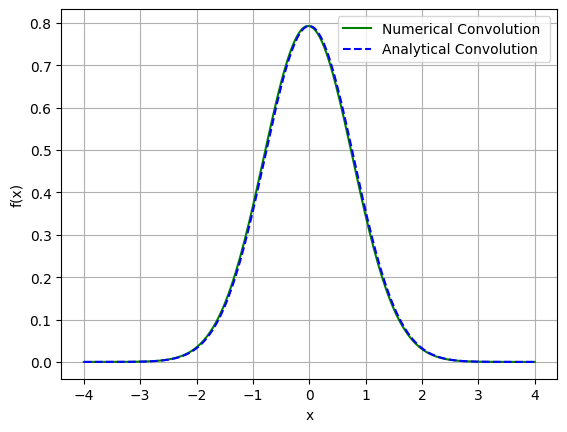

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,a):
    return np.exp(-a*x**2)

x_min = -4
x_max = 4
num_points = 200
dx = (x_max - x_min) / (num_points - 1)

x_arr = np.linspace(x_min, x_max, num_points)


# Define the convolution function
def convolution(f, g, dx, n):

    # zero padding the function
    f_padded = np.pad(f, (0, len(g)), mode='constant')
    g_padded = np.pad(g, (0, len(f)), mode='constant')
    # Taking discrete fourier transform using np.fft.fft
    f_dft = np.fft.fft(f_padded, norm = 'ortho')
    g_dft = np.fft.fft(g_padded, norm = 'ortho')
    #multiplying the fourier transform results
    h_dft = f_dft * g_dft
    #Taking inverse fourier transform of the result
    convo = np.fft.ifft(h_dft, norm = 'ortho').real
    # Scale by dx
    convolved_function=convo * dx * np.sqrt(2*n)
    return convolved_function

#convolution of one gaussian with another gaussian
f1=f(x_arr,1)
f2=f(x_arr,4)
gaussian_convo_gaussian=convolution(f1,f2,dx,num_points)
convo_result =gaussian_convo_gaussian[int(num_points/2):int(-num_points/2)]

# analytical convolution
def convo_analytical(x):
    return np.sqrt(np.pi/5) * np.exp(- (4 * x**2)/5)

analytical_result = convo_analytical(x_arr)


# Plot the convolution result
plt.plot(x_arr, convo_result[:len(x_arr)], label='Numerical Convolution ', color = 'g')
plt.plot(x_arr, analytical_result, label = 'Analytical Convolution', color ='b', linestyle = '--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
